In [2]:
import glob
import numpy as np
from os.path import splitext
from os.path import split

In [3]:
import glob
import numpy as np
from os.path import splitext
from os.path import split
from os import listdir
import re
from shutil import copyfile

In [4]:
import h5py
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [5]:
h5 = h5py.File('data/hdf5/vtk2D_512v2.h5', 'r')


In [6]:
keyList = list(h5.keys())
print(len(keyList))
print(keyList[0])

726
[0.0-1-0.25]


[0.0-1-0.25]
(64, 64)


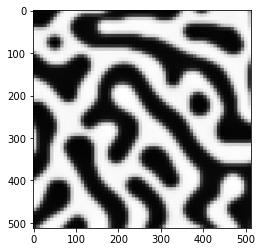

In [14]:
### return 2d image array from h5 dataset using keyList
keyNum = 0
print(keyList[keyNum])
cArr = np.array(h5.get(keyList[keyNum]))[:,:,0]

cArr = cArr[64:128, 64:128]
print(cArr.shape)

resized = cv2.resize(cArr, (512,512), interpolation=cv2.INTER_NEAREST)
cv2.imwrite('0.00-0.25_v2.png', resized*255)
plt.imshow(resized, cmap='gray') #cmap='bwr'
plt.show()

### test sizing for cropped subImages
# startX=0
# startY=0
# newX=64
# newY=64
# subArr = cArr[startX:startX+newX, startY:startY+newY, 0]
# plt.imshow(subArr, cmap='bwr')


In [11]:
### this approach will grab a set number of smaller image tiles from a larger image for each group/image in an hdf5 file
### it will randomly choose an x and y pixel to serve as the starting pixel and then get desired image from there

#desired size of output images to csv
newX = 28
newY = 28

#load in the first dataset of the hdf5 file in order to get dimensions of data
cArr = np.array(h5.get(keyList[0]))

#max dimensions are total dimensions minus the size of the desired image - limits starting pixel to area that can produce desired image size
maxX = cArr.shape[0] - newX
maxY = cArr.shape[1] - newY

numImg = 10 #number of random subimages to be pulled from each hdf5 group
numKeys = len(h5.keys()) #number of groups in hdf5 file used to preallocate output array size
fullArr = np.zeros((numImg*numKeys, newX*newY)) #preallocated output array
nameArr = [] #filled with key names used as labels for csv file
count = 0 #initiates count for filling in preallocated array

for key in h5.keys():
    # print(key)

    cArr = np.array(h5.get(key)) #get current array from hdf5 file
    # print(cArr.shape)

    #loop through image getting desired number of random tiles
    for num in np.arange(numImg):
        startX = random.randint(0, maxX) #starting pixels for x and y position
        startY = random.randint(0, maxY)

        subArr = cArr[startX:startX+newX, startY:startY+newY, 0] #get subImage/tile of desired output size to csv
        # print(subArr.shape)
        subArr = np.reshape(subArr, (1, newX*newY)) #reformat to a single row array for csv output
        # print(subArr.shape)
        fullArr[count,:] = subArr #add to preallocated array
        nameArr.append(key) #add the name the subimage was taken from for csv label
        count += 1

fullArr = np.asarray(fullArr)
nameArr = np.asarray(nameArr)
# print(fullArr.shape)
# print(nameArr.shape)

df = pd.DataFrame(data=fullArr, index=nameArr) #create pandas dataframe with array and names as the index

print(df.shape)
df.to_csv('vtk2D_128to28.csv', header=False, index=True) #output dataframe to csv file

(7260, 784)


In [12]:
print(df)

                   0         1         2         3         4         5    \
[0.0-1-0.25] -0.346027  0.718967  0.986387  1.004690  1.012975  1.005604   
[0.0-1-0.25]  0.619427  0.610516  0.615666  0.654255  0.769461  0.916181   
[0.0-1-0.25]  0.964598  0.701619 -0.384716 -0.917945 -0.977725 -0.977469   
[0.0-1-0.25] -0.999750 -0.972805 -0.844163 -0.409481  0.442554  0.857760   
[0.0-1-0.25] -0.714238 -0.911717 -0.974204 -0.979847 -0.930110 -0.435206   
...                ...       ...       ...       ...       ...       ...   
[0.25-9-0.7]  0.784639  0.864374  0.884457  0.883131  0.882216  0.890686   
[0.25-9-0.7] -0.923697 -0.578999  0.147757  0.691729  0.853123  0.833887   
[0.25-9-0.7]  0.612297  0.656211  0.694909  0.728459  0.762279  0.798145   
[0.25-9-0.7]  0.436094  0.010208 -0.294915 -0.374752 -0.218890  0.149434   
[0.25-9-0.7]  0.901575  0.921917  0.883682  0.717367  0.266354 -0.347462   

                   6         7         8         9    ...       774       775  \
[0.0-1